# Titanic Classification

## 1. Data Load

In [2]:
titanic_data <- read.csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv", na.strings = c("")) # empty strings is missing data and wiil be replaced with NA
head(titanic_data)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>
1,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NA,"St Louis, MO"
2,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NA,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NA,NA,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NA,135,"Montreal, PQ / Chesterville, ON"
5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NA,NA,"Montreal, PQ / Chesterville, ON"
6,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NA,"New York, NY"


In [4]:
str(titanic_data)

'data.frame':	1310 obs. of  14 variables:
 $ pclass   : int  1 1 1 1 1 1 1 1 1 1 ...
 $ survived : int  1 1 0 0 0 1 1 0 1 0 ...
 $ name     : chr  "Allen, Miss. Elisabeth Walton" "Allison, Master. Hudson Trevor" "Allison, Miss. Helen Loraine" "Allison, Mr. Hudson Joshua Creighton" ...
 $ sex      : chr  "female" "male" "female" "male" ...
 $ age      : num  29 0.917 2 30 25 ...
 $ sibsp    : int  0 1 1 1 1 0 1 0 2 0 ...
 $ parch    : int  0 2 2 2 2 0 0 0 0 0 ...
 $ ticket   : chr  "24160" "113781" "113781" "113781" ...
 $ fare     : num  211 152 152 152 152 ...
 $ cabin    : chr  "B5" "C22 C26" "C22 C26" "C22 C26" ...
 $ embarked : chr  "S" "S" "S" "S" ...
 $ boat     : chr  "2" "11" NA NA ...
 $ body     : int  NA NA NA 135 NA NA NA NA NA 22 ...
 $ home.dest: chr  "St Louis, MO" "Montreal, PQ / Chesterville, ON" "Montreal, PQ / Chesterville, ON" "Montreal, PQ / Chesterville, ON" ...


## 2. Data preprocessing

## 2.1. Remove columns

In [8]:
library(dplyr)

In [9]:
#titanic_data <- titanic_data |>
 #   select(-c(name, ticket, boat, body, home.dest))
head(titanic_data)

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked
,<int>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<chr>,<chr>
1,1,1,female,29.0000,0,0,211.3375,B5,S
2,1,1,male,0.9167,1,2,151.5500,C22 C26,S
3,1,0,female,2.0000,1,2,151.5500,C22 C26,S
4,1,0,male,30.0000,1,2,151.5500,C22 C26,S
5,1,0,female,25.0000,1,2,151.5500,C22 C26,S
6,1,1,male,48.0000,0,0,26.5500,E12,S


In [11]:
summary(titanic_data)

     pclass         survived         sex                 age         
 Min.   :1.000   Min.   :0.000   Length:1310        Min.   : 0.1667  
 1st Qu.:2.000   1st Qu.:0.000   Class :character   1st Qu.:21.0000  
 Median :3.000   Median :0.000   Mode  :character   Median :28.0000  
 Mean   :2.295   Mean   :0.382                      Mean   :29.8811  
 3rd Qu.:3.000   3rd Qu.:1.000                      3rd Qu.:39.0000  
 Max.   :3.000   Max.   :1.000                      Max.   :80.0000  
 NA's   :1       NA's   :1                          NA's   :264      
     sibsp            parch            fare            cabin          
 Min.   :0.0000   Min.   :0.000   Min.   :  0.000   Length:1310       
 1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:  7.896   Class :character  
 Median :0.0000   Median :0.000   Median : 14.454   Mode  :character  
 Mean   :0.4989   Mean   :0.385   Mean   : 33.295                     
 3rd Qu.:1.0000   3rd Qu.:0.000   3rd Qu.: 31.275                     
 Max.   :8.000

## 2.2. Check missing data

In [15]:
#install.packages("mice")

In [17]:
library(mice)

,pclass,survived,sex,sibsp,parch,fare,embarked,age,cabin,
270,1,1,1,1,1,1,1,1,1,0
773,1,1,1,1,1,1,1,1,0,1
23,1,1,1,1,1,1,1,0,1,1
240,1,1,1,1,1,1,1,0,0,2
2,1,1,1,1,1,1,0,1,1,1
1,1,1,1,1,1,0,1,1,0,2
1,0,0,0,0,0,0,0,0,0,9
,1,1,1,1,1,2,3,264,1015,1289


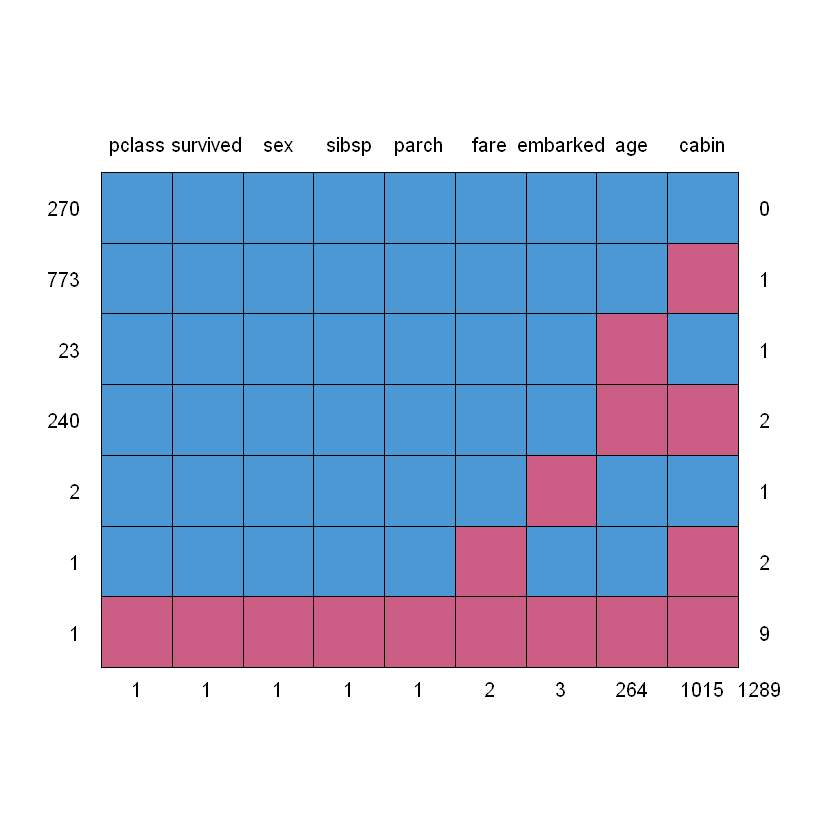

In [19]:
md.pattern(titanic_data)

In [21]:
titanic_data <- titanic_data |> filter(!is.na(survived))

,pclass,survived,sex,sibsp,parch,fare,embarked,age,cabin,
270,1,1,1,1,1,1,1,1,1,0
773,1,1,1,1,1,1,1,1,0,1
23,1,1,1,1,1,1,1,0,1,1
240,1,1,1,1,1,1,1,0,0,2
2,1,1,1,1,1,1,0,1,1,1
1,1,1,1,1,1,0,1,1,0,2
,0,0,0,0,0,1,2,263,1014,1280


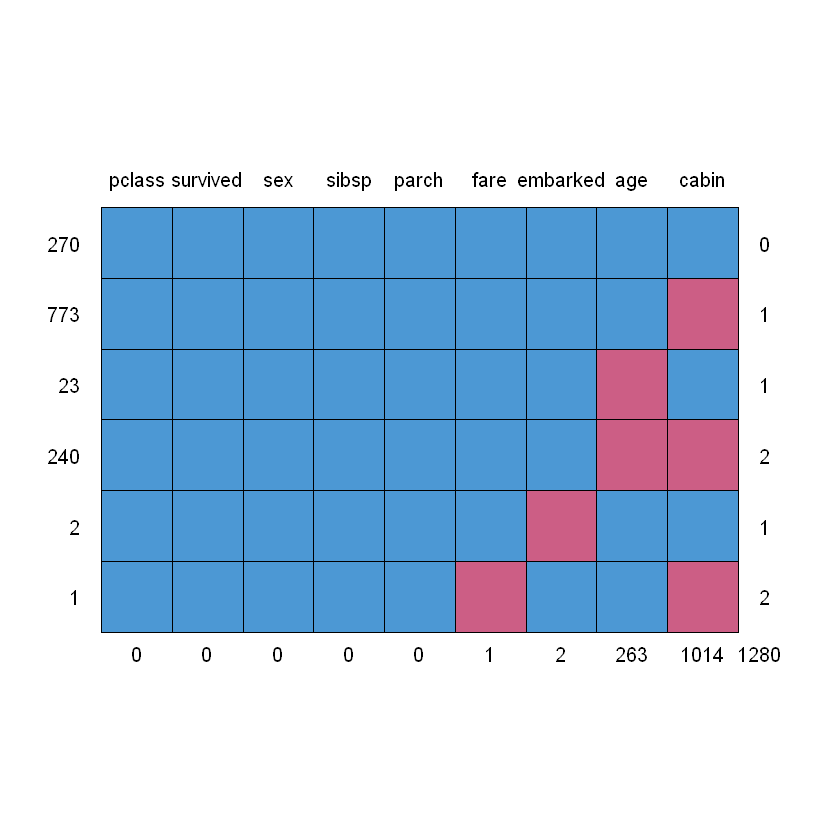

In [22]:
md.pattern(titanic_data)

## 2.3. Data visualization

In [24]:
library(ggplot2)
library(gmodels)

In [26]:
CrossTable(titanic_data$survived)


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  1309 

 
          |         0 |         1 | 
          |-----------|-----------|
          |       809 |       500 | 
          |     0.618 |     0.382 | 
          |-----------|-----------|



 


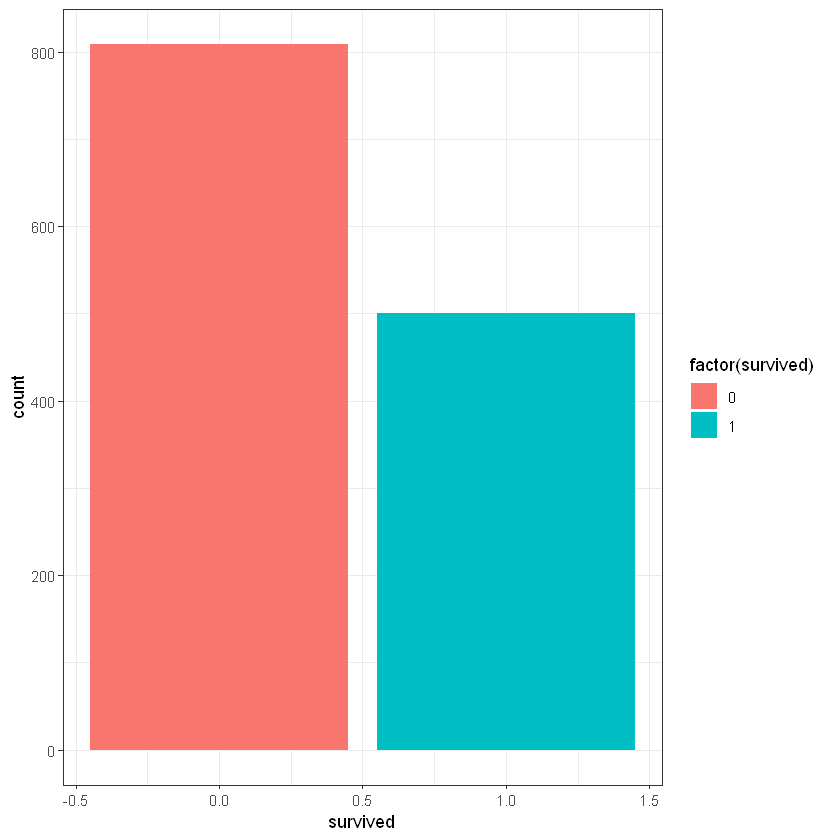

In [31]:
ggplot(titanic_data, aes(survived)) +
    geom_bar(aes(fill = factor(survived))) +
    theme_bw()

In [33]:
CrossTable(titanic_data$survived, titanic_data$pclass)


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  1309 

 
                      | titanic_data$pclass 
titanic_data$survived |         1 |         2 |         3 | Row Total | 
----------------------|-----------|-----------|-----------|-----------|
                    0 |       123 |       158 |       528 |       809 | 
                      |    29.411 |     1.017 |    18.411 |           | 
                      |     0.152 |     0.195 |     0.653 |     0.618 | 
                      |     0.381 |     0.570 |     0.745 |           | 
                      |     0.094 |     0.121 |     0.403 |           | 
----------------------|-----------|-----------|-----------|-----------|
                    1 |       200 |       119 |       181 |       500 | 
                      |    47.587 |     1.

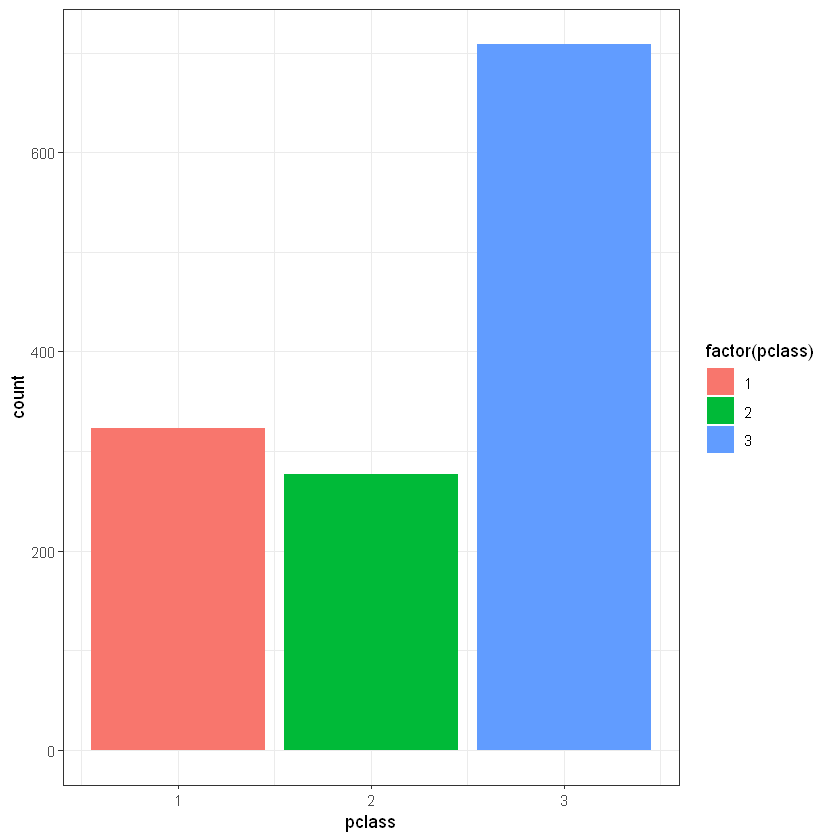

In [35]:
ggplot(titanic_data, aes(pclass)) + geom_bar(aes(fill = factor(pclass)))+ theme_bw()

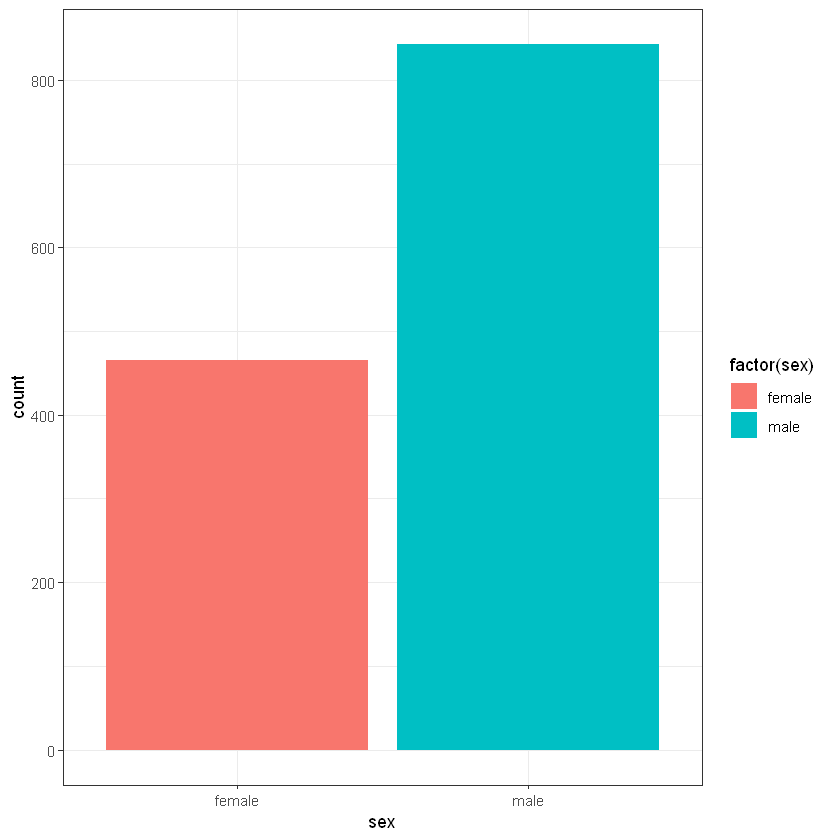

In [37]:
ggplot(titanic_data, aes(x = sex)) + geom_bar(aes(fill = factor(sex))) + theme_bw()

Warning message:
"Removed 263 rows containing non-finite values (`stat_bin()`)."


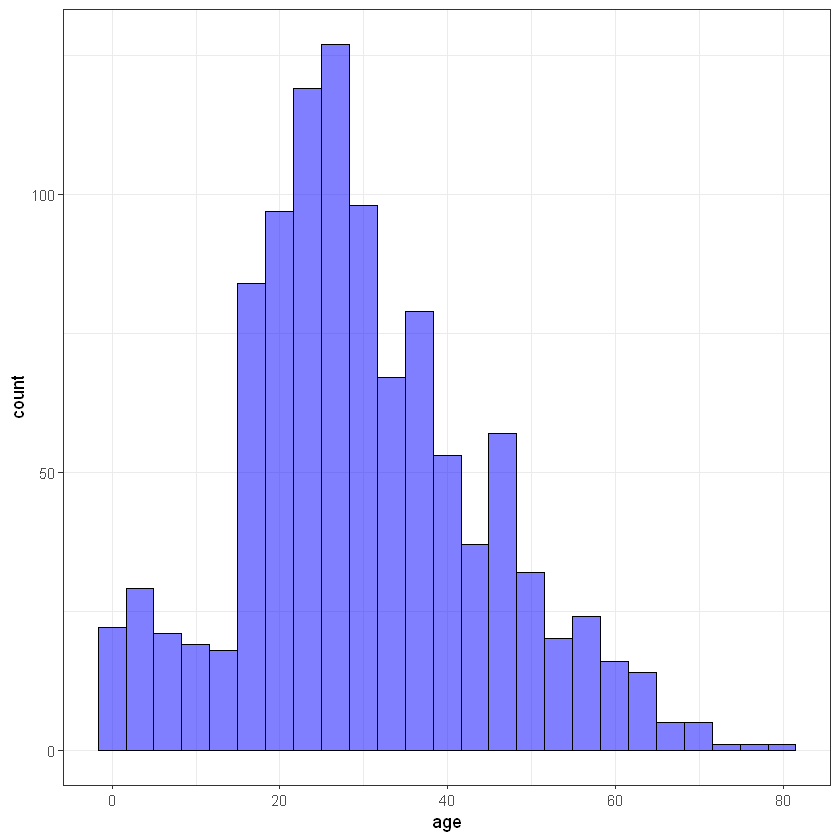

In [39]:
ggplot(titanic_data, aes(age)) + geom_histogram(bins = 25, alpha = 0.5, fill = 'blue', color='black')  + theme_bw()

Warning message:
"Removed 1 rows containing non-finite values (`stat_bin()`)."


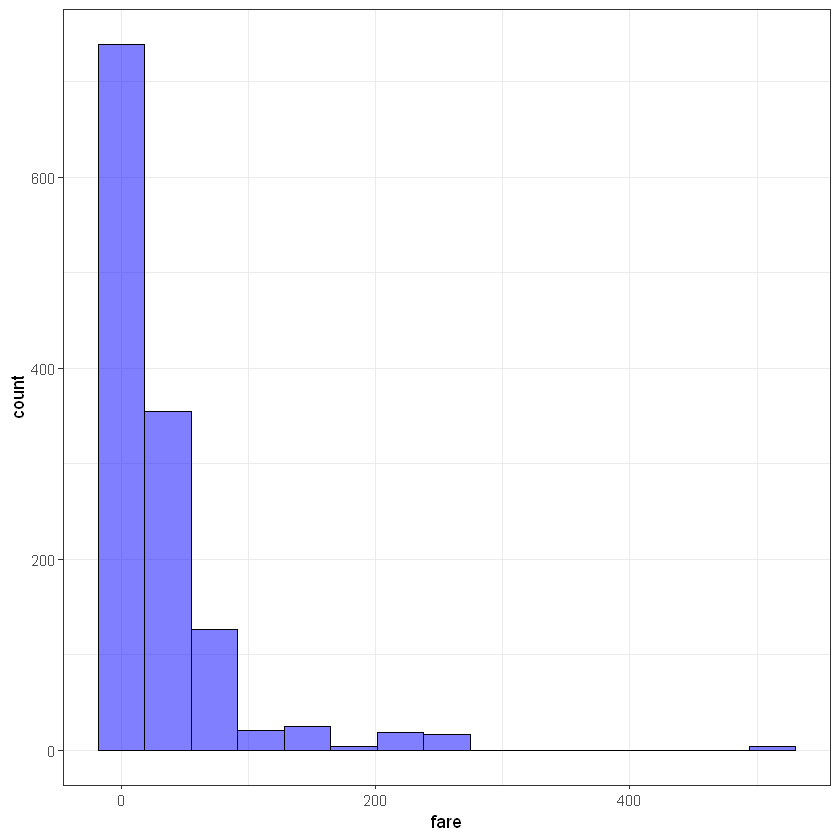

In [41]:
ggplot(titanic_data, aes(fare)) + geom_histogram(bins = 15, alpha = 0.5, fill = 'blue', color='black')+ theme_bw()

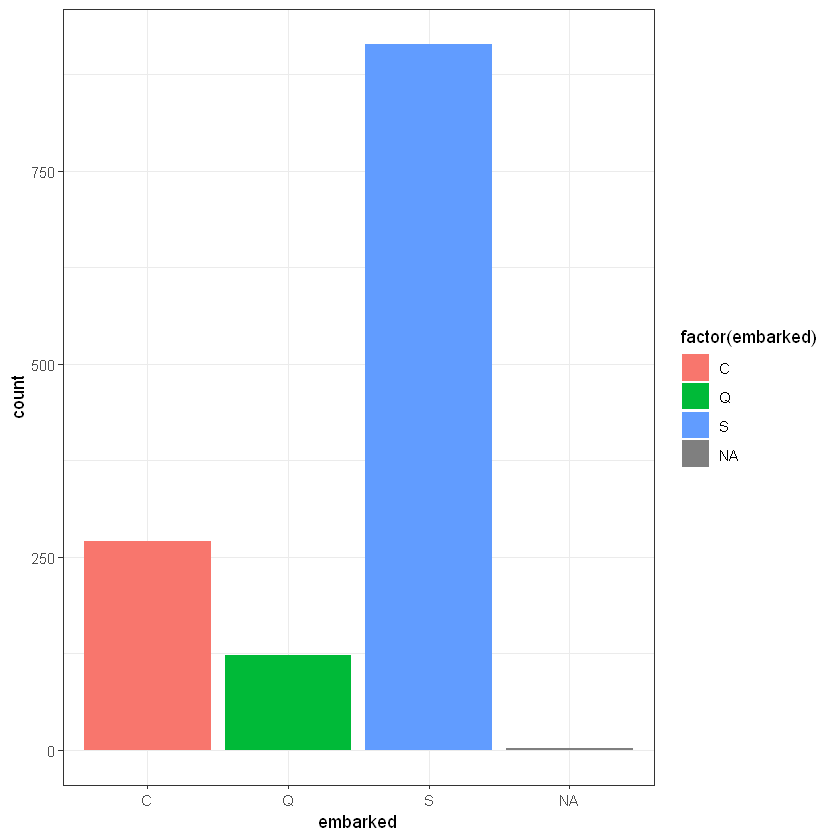

In [43]:
ggplot(titanic_data, aes(embarked)) + geom_bar(aes(fill = factor(embarked)))+ theme_bw()

## 3. Data split

In [46]:
#install.packages("caTools")

In [65]:
set.seed(2024) 
library(caTools)
split <- sample.split(titanic_data$survived, SplitRatio = 0.7)
titanic_train <- subset(titanic_data, split == TRUE)
titanic_test <- subset(titanic_data, split == FALSE)

In [49]:
CrossTable(titanic_train$survived)
CrossTable(titanic_test$survived)


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  916 

 
          |         0 |         1 | 
          |-----------|-----------|
          |       566 |       350 | 
          |     0.618 |     0.382 | 
          |-----------|-----------|



 

 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  393 

 
          |         0 |         1 | 
          |-----------|-----------|
          |       243 |       150 | 
          |     0.618 |     0.382 | 
          |-----------|-----------|



 


## 4. Missing data replacement

,pclass,survived,sex,sibsp,parch,fare,embarked,age,cabin,
189,1,1,1,1,1,1,1,1,1,0
542,1,1,1,1,1,1,1,1,0,1
18,1,1,1,1,1,1,1,0,1,1
165,1,1,1,1,1,1,1,0,0,2
1,1,1,1,1,1,1,0,1,1,1
1,1,1,1,1,1,0,1,1,0,2
,0,0,0,0,0,1,1,183,708,893


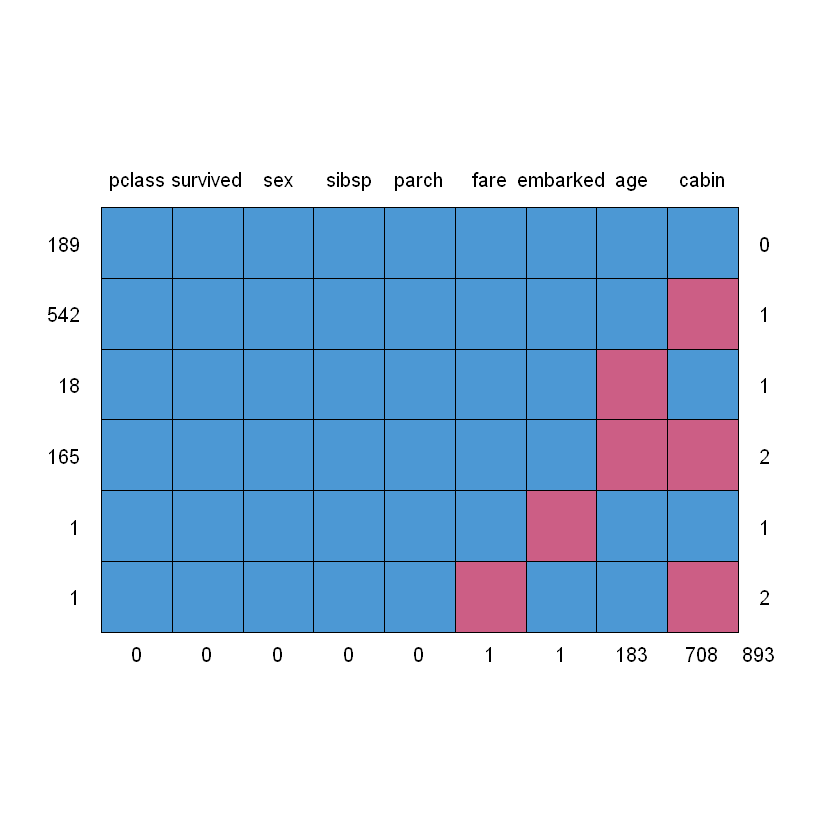

In [51]:
md.pattern(titanic_train)

,pclass,survived,sex,sibsp,parch,fare,embarked,age,cabin,
81,1,1,1,1,1,1,1,1,1,0
231,1,1,1,1,1,1,1,1,0,1
5,1,1,1,1,1,1,1,0,1,1
75,1,1,1,1,1,1,1,0,0,2
1,1,1,1,1,1,1,0,1,1,1
,0,0,0,0,0,0,1,80,306,387


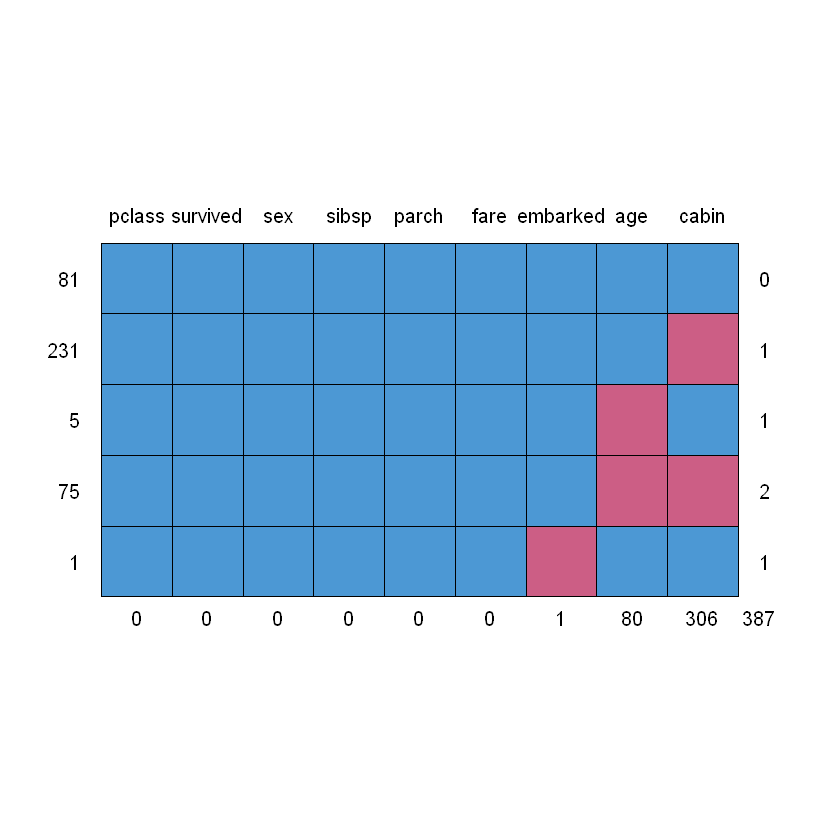

In [53]:
md.pattern(titanic_test)

In [55]:
head(titanic_train)

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked
,<int>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<chr>,<chr>
2,1,1,male,0.9167,1,2,151.5500,C22 C26,S
4,1,0,male,30.0000,1,2,151.5500,C22 C26,S
5,1,0,female,25.0000,1,2,151.5500,C22 C26,S
6,1,1,male,48.0000,0,0,26.5500,E12,S
7,1,1,female,63.0000,1,0,77.9583,D7,S
8,1,0,male,39.0000,0,0,0.0000,A36,S


In [66]:
titanic_train <- titanic_train |>
    mutate(hascabin = ifelse(!is.na(cabin), 1, 0)) |>
    select(-cabin) # remove cabin column

 titanic_test <- titanic_test |> mutate(hascabin = ifelse(!is.na(cabin), 1, 0)) |>
    select(-cabin) # remove cabin column

In [68]:
head(titanic_train)

,pclass,survived,sex,age,sibsp,parch,fare,embarked,hascabin
,<int>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<chr>,<dbl>
2,1,1,male,0.9167,1,2,151.5500,S,1
4,1,0,male,30.0000,1,2,151.5500,S,1
5,1,0,female,25.0000,1,2,151.5500,S,1
6,1,1,male,48.0000,0,0,26.5500,S,1
7,1,1,female,63.0000,1,0,77.9583,S,1
8,1,0,male,39.0000,0,0,0.0000,S,1


In [70]:
titanic_train |> filter(is.na(fare))

pclass,survived,sex,age,sibsp,parch,fare,embarked,hascabin
<int>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<chr>,<dbl>
3,0,male,60.5,0,0,NA,S,0


In [81]:
avg_fare <- titanic_data |> filter(pclass == 3) |> select(fare)
avg_fare <- round(mean(unlist(avg_fare), na.rm = T))

In [83]:
library(tidyr)

In [84]:
titanic_train <- titanic_train |> 
    mutate(fare = replace_na(fare, avg_fare))

In [86]:
any(is.na(titanic_train$fare))

[1] FALSE

In [87]:
getmode <- function(v) {
  uniqv <- unique(v) # select all unique values
  uniqv[which.max(tabulate(match(v, uniqv)))] # select value that included most times
}

In [89]:
embarked_moda <- getmode(titanic_data$embarked)
embarked_moda

[1] "S"

In [91]:
titanic_train <- titanic_train %>% 
    mutate(embarked = replace_na(embarked, embarked_moda))

titanic_test <- titanic_test %>% 
    mutate(embarked = replace_na(embarked, embarked_moda))

Warning message:
"Removed 183 rows containing non-finite values (`stat_boxplot()`)."


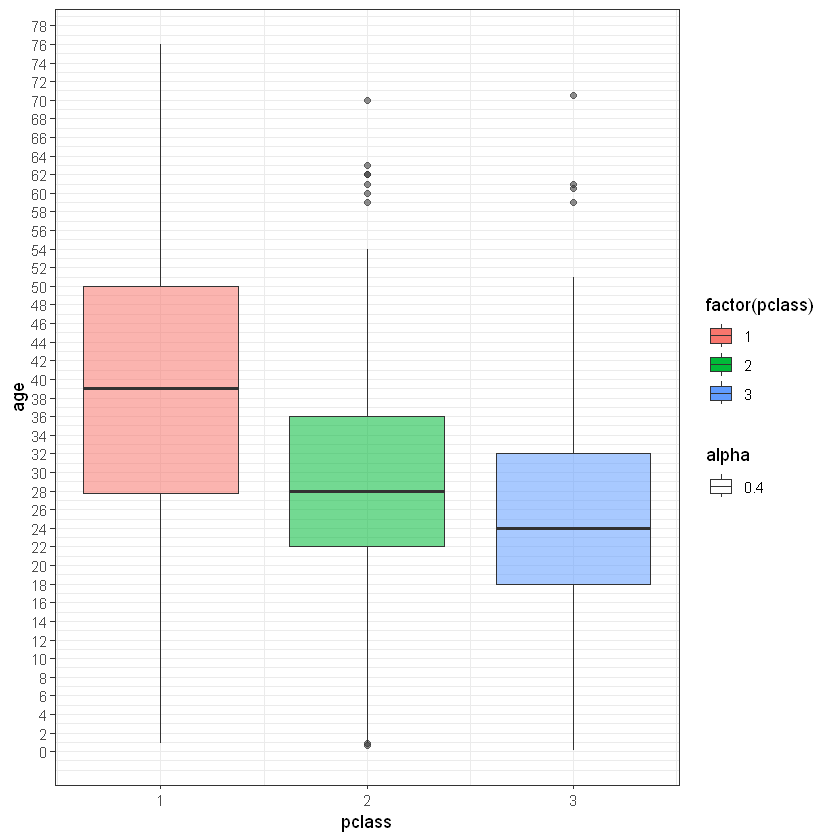

In [93]:
age_plot <- ggplot(titanic_train, aes(pclass, age)) 
age_plot <- age_plot + geom_boxplot(aes(group = pclass, fill = factor(pclass), alpha = 0.4)) # alpha == opacity of chart elements
age_plot <- age_plot + scale_y_continuous(breaks = seq(min(0), max(80), by = 2)) + theme_bw()
age_plot

In [95]:
pclass_ages <- titanic_train %>%
    group_by(pclass) %>%
    summarise(mean_age = floor(mean(age, na.rm =T)))
pclass_ages

pclass,mean_age
<int>,<dbl>
1,38
2,28
3,24


In [97]:
titanic_train <- titanic_train %>% 
    mutate(age = ifelse(is.na(age), pclass_ages$mean_age[pclass], age))

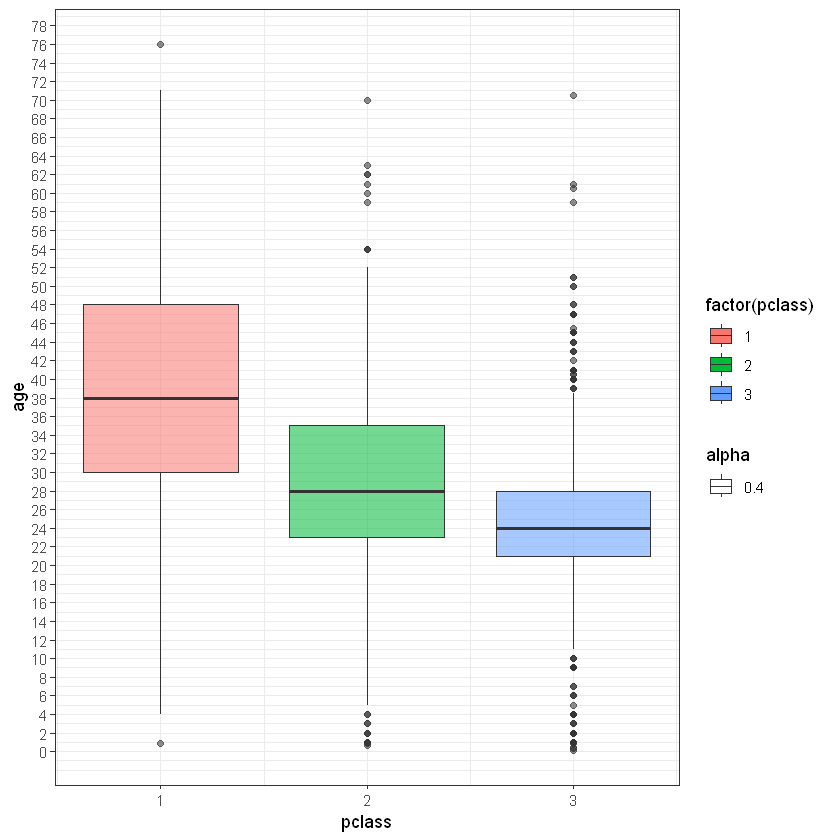

In [99]:
age_plot <- ggplot(titanic_train, aes(pclass, age)) 
age_plot <- age_plot + geom_boxplot(aes(group = pclass, fill = factor(pclass), alpha = 0.4)) # alpha == opacity of chart elements
age_plot <- age_plot + scale_y_continuous(breaks = seq(min(0), max(80), by = 2)) + theme_bw()
age_plot

In [101]:
titanic_test <- titanic_test %>% 
       mutate(age = ifelse(is.na(age), pclass_ages$mean_age[pclass], age))

 /\     /\
{  `---'  }
{  O   O  }
==>  V <==  No need for mice. This data set is completely observed.
 \  \|/  /
  `-----'



,pclass,survived,sex,age,sibsp,parch,fare,embarked,hascabin,
916,1,1,1,1,1,1,1,1,1,0
,0,0,0,0,0,0,0,0,0,0


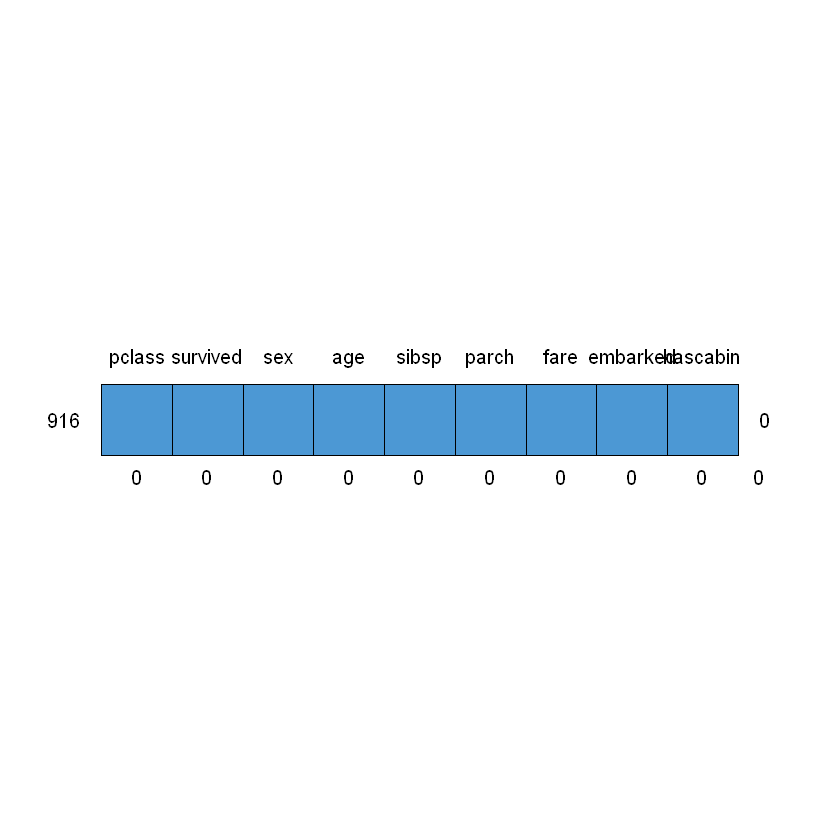

In [103]:
md.pattern(titanic_train)

 /\     /\
{  `---'  }
{  O   O  }
==>  V <==  No need for mice. This data set is completely observed.
 \  \|/  /
  `-----'



,pclass,survived,sex,age,sibsp,parch,fare,embarked,hascabin,
393,1,1,1,1,1,1,1,1,1,0
,0,0,0,0,0,0,0,0,0,0


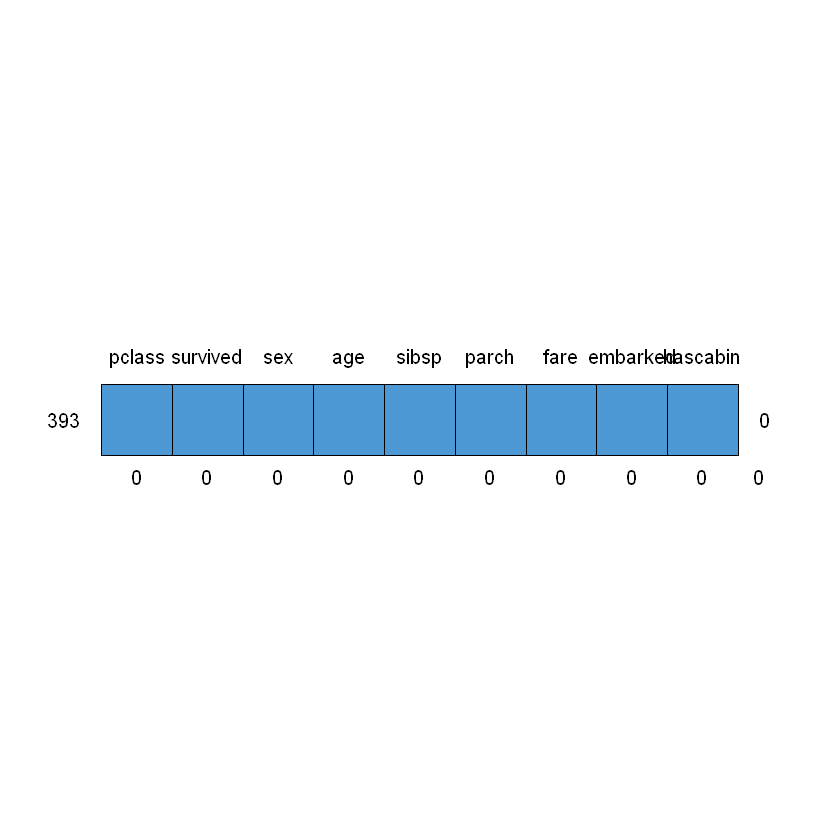

In [105]:
md.pattern(titanic_test)

## 5. Model building

In [108]:
head(titanic_train)

,pclass,survived,sex,age,sibsp,parch,fare,embarked,hascabin
,<int>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<chr>,<dbl>
2,1,1,male,0.9167,1,2,151.5500,S,1
4,1,0,male,30.0000,1,2,151.5500,S,1
5,1,0,female,25.0000,1,2,151.5500,S,1
6,1,1,male,48.0000,0,0,26.5500,S,1
7,1,1,female,63.0000,1,0,77.9583,S,1
8,1,0,male,39.0000,0,0,0.0000,S,1


In [110]:
titanic_train$pclass <- factor(titanic_train$pclass, levels = c(1,2,3))
titanic_train$survived <- factor(titanic_train$survived, levels = c(0, 1))
titanic_train$hascabin<- factor(titanic_train$hascabin, levels = c(0, 1))

titanic_train$embarked <- factor(titanic_train$embarked, levels = c('S', 'C', 'Q'))
titanic_train$sex <- factor(titanic_train$sex, levels = c('female', 'male'))

head(titanic_train)

,pclass,survived,sex,age,sibsp,parch,fare,embarked,hascabin
,<fct>,<fct>,<fct>,<dbl>,<int>,<int>,<dbl>,<fct>,<fct>
2,1,1,male,0.9167,1,2,151.5500,S,1
4,1,0,male,30.0000,1,2,151.5500,S,1
5,1,0,female,25.0000,1,2,151.5500,S,1
6,1,1,male,48.0000,0,0,26.5500,S,1
7,1,1,female,63.0000,1,0,77.9583,S,1
8,1,0,male,39.0000,0,0,0.0000,S,1


In [112]:
titanic_test$pclass <- factor(titanic_test$pclass, levels = c(1,2,3))
titanic_test$survived <- factor(titanic_test$survived, levels = c(0, 1))
titanic_test$hascabin<- factor(titanic_test$hascabin, levels = c(0, 1))

titanic_test$embarked <- factor(titanic_test$embarked, levels = c('S', 'C', 'Q'))
titanic_test$sex <- factor(titanic_test$sex, levels = c('female', 'male'))

head(titanic_test)

,pclass,survived,sex,age,sibsp,parch,fare,embarked,hascabin
,<fct>,<fct>,<fct>,<dbl>,<int>,<int>,<dbl>,<fct>,<fct>
1,1,1,female,29,0,0,211.3375,S,1
3,1,0,female,2,1,2,151.5500,S,1
10,1,0,male,71,0,0,49.5042,C,0
15,1,1,male,80,0,0,30.0000,S,1
19,1,1,female,32,0,0,76.2917,C,1
21,1,1,male,37,1,1,52.5542,S,1


In [114]:
def_glm <- glm(formula = survived ~ ., family = binomial(link = "logit"), data = titanic_train)
summary(def_glm)


Call:
glm(formula = survived ~ ., family = binomial(link = "logit"), 
    data = titanic_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4095  -0.6015  -0.3923   0.5737   2.6619  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.262736   0.543904   5.999 1.99e-09 ***
pclass2     -0.657637   0.377371  -1.743  0.08139 .  
pclass3     -1.742837   0.397465  -4.385 1.16e-05 ***
sexmale     -2.793824   0.202187 -13.818  < 2e-16 ***
age         -0.041861   0.008436  -4.962 6.98e-07 ***
sibsp       -0.328577   0.111091  -2.958  0.00310 ** 
parch       -0.069026   0.110624  -0.624  0.53265    
fare         0.001319   0.002496   0.528  0.59726    
embarkedC    0.451241   0.237224   1.902  0.05715 .  
embarkedQ    0.042958   0.315594   0.136  0.89173    
hascabin1    0.896952   0.313022   2.865  0.00416 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)



In [116]:
titanic_train <- titanic_train |>
    mutate(predicted = predict(def_glm, newdata = titanic_train, type = 'response'))

titanic_test <- titanic_test |>
    mutate(predicted = predict(def_glm, newdata = titanic_test, type = 'response'))

In [118]:
head(titanic_train)

,pclass,survived,sex,age,sibsp,parch,fare,embarked,hascabin,predicted
,<fct>,<fct>,<fct>,<dbl>,<int>,<int>,<dbl>,<fct>,<fct>,<dbl>
2,1,1,male,0.9167,1,2,151.5500,S,1,0.7428337
4,1,0,male,30.0000,1,2,151.5500,S,1,0.4609066
5,1,0,female,25.0000,1,2,151.5500,S,1,0.9451340
6,1,1,male,48.0000,0,0,26.5500,S,1,0.3524190
7,1,1,female,63.0000,1,0,77.9583,S,1,0.7852826
8,1,0,male,39.0000,0,0,0.0000,S,1,0.4337183


In [121]:
titanic_train <- titanic_train %>%
    mutate(survived_05 = as.factor(ifelse(predicted >= 0.5, 1 , 0)))

titanic_test <- titanic_test %>%
    mutate(survived_05 = as.factor(ifelse(predicted >= 0.5, 1 , 0)))

head(titanic_train)

,pclass,survived,sex,age,sibsp,parch,fare,embarked,hascabin,predicted,survived_05
,<fct>,<fct>,<fct>,<dbl>,<int>,<int>,<dbl>,<fct>,<fct>,<dbl>,<fct>
2,1,1,male,0.9167,1,2,151.5500,S,1,0.7428337,1
4,1,0,male,30.0000,1,2,151.5500,S,1,0.4609066,0
5,1,0,female,25.0000,1,2,151.5500,S,1,0.9451340,1
6,1,1,male,48.0000,0,0,26.5500,S,1,0.3524190,0
7,1,1,female,63.0000,1,0,77.9583,S,1,0.7852826,1
8,1,0,male,39.0000,0,0,0.0000,S,1,0.4337183,0


In [123]:
table(titanic_train$survived, titanic_train$survived_05)

   
      0   1
  0 494  72
  1  95 255

In [125]:
table(titanic_test$survived, titanic_test$survived_05)

   
      0   1
  0 200  43
  1  55  95

In [127]:
caret::confusionMatrix(titanic_train$survived, titanic_train$survived_05, positive = "1")

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 494  72
         1  95 255
                                          
               Accuracy : 0.8177          
                 95% CI : (0.7911, 0.8422)
    No Information Rate : 0.643           
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.609           
                                          
 Mcnemar's Test P-Value : 0.08868         
                                          
            Sensitivity : 0.7798          
            Specificity : 0.8387          
         Pos Pred Value : 0.7286          
         Neg Pred Value : 0.8728          
             Prevalence : 0.3570          
         Detection Rate : 0.2784          
   Detection Prevalence : 0.3821          
      Balanced Accuracy : 0.8093          
                                          
       'Positive' Class : 1               
                              

In [136]:
caret::confusionMatrix(titanic_test$survived, titanic_test$survived_05, positive = "1")

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 200  43
         1  55  95
                                          
               Accuracy : 0.7506          
                 95% CI : (0.7048, 0.7927)
    No Information Rate : 0.6489          
    P-Value [Acc > NIR] : 9.225e-06       
                                          
                  Kappa : 0.4635          
                                          
 Mcnemar's Test P-Value : 0.2665          
                                          
            Sensitivity : 0.6884          
            Specificity : 0.7843          
         Pos Pred Value : 0.6333          
         Neg Pred Value : 0.8230          
             Prevalence : 0.3511          
         Detection Rate : 0.2417          
   Detection Prevalence : 0.3817          
      Balanced Accuracy : 0.7364          
                                          
       'Positive' Class : 1               
                              

ERROR: Error in library(devtools): there is no package called 'devtools'


In [144]:
#install.packages("devtools")
install.packages("usethis")

also installing the dependencies 'curl', 'httr2', 'gh'





  There are binary versions available but the source versions are later:
        binary source needs_compilation
curl     5.0.0  5.2.1              TRUE
httr2    0.2.2  1.0.1             FALSE
gh       1.4.0  1.4.1             FALSE
usethis  2.1.6  2.2.3             FALSE

  Binaries will be installed
package 'curl' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	G:\Temp\RtmpmCZutO\downloaded_packages


installing the source packages 'httr2', 'gh', 'usethis'


Warning message in install.packages("usethis"):
"installation of package 'httr2' had non-zero exit status"
Warning message in install.packages("usethis"):
"installation of package 'gh' had non-zero exit status"
Warning message in install.packages("usethis"):
"installation of package 'usethis' had non-zero exit status"


In [145]:
library(devtools)

ERROR: Error: package 'usethis' required by 'devtools' could not be found


In [134]:

library(InformationValue)

ERROR: Error in library(InformationValue): there is no package called 'InformationValue'
